<a href="https://colab.research.google.com/github/SyedT1/Data-Mining-CSC417/blob/main/Week%202/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
path = 'https://raw.githubusercontent.com/SyedT1/Data-Mining-CSC417/main/Week%201/datasets/iris.data'
cols = ['sepal_len','sepal_wid','petal_len','petal_wid','name']
df = pd.read_csv(path,names = cols)
print(df)
species = [i for i in set(df['name'])]
species = species[::-1]
print(species)
df = df.drop('petal_wid',axis=1)

     sepal_len  sepal_wid  petal_len  petal_wid            name
0          5.1        3.5        1.4        0.2     Iris-setosa
1          4.9        3.0        1.4        0.2     Iris-setosa
2          4.7        3.2        1.3        0.2     Iris-setosa
3          4.6        3.1        1.5        0.2     Iris-setosa
4          5.0        3.6        1.4        0.2     Iris-setosa
..         ...        ...        ...        ...             ...
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']


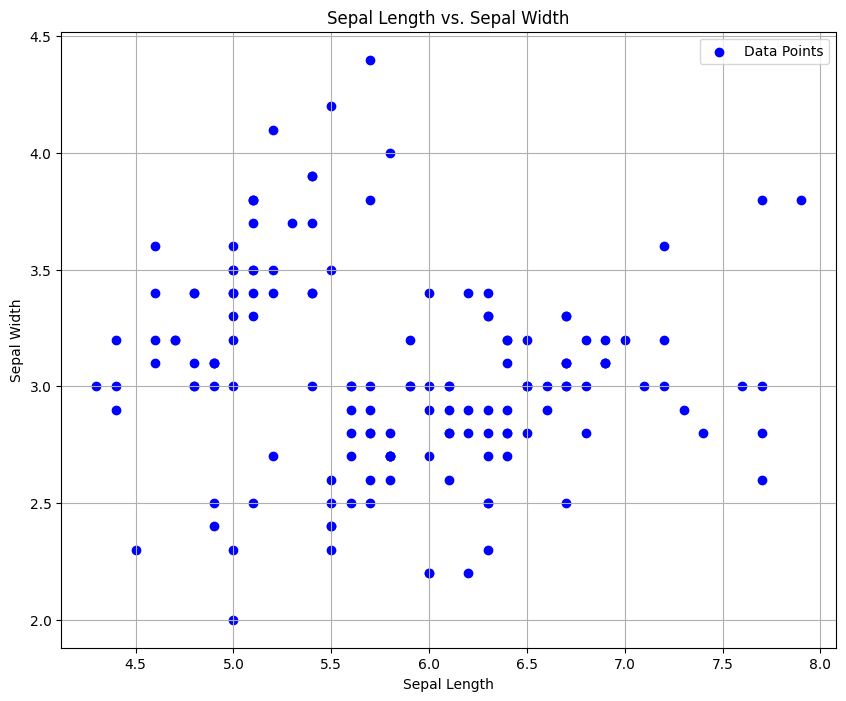

In [4]:
# 1. Plot the data points using the first two dimensions (Sepal Length and Sepal Width) .
sepal_length = df['sepal_len']
sepal_width =  df['sepal_wid']
plt.figure(figsize=(10,8))
plt.scatter(sepal_length, sepal_width, c='blue', marker='o', label='Data Points')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

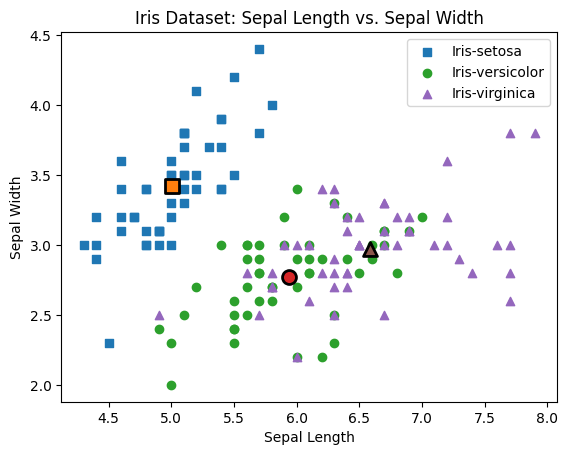

In [5]:
import matplotlib.pyplot as plt
 # 2. Use three different shapes (triangle, square, circle) to plot datapoints for three different classes. You should use the class information from class label and use them when you decide on shapes (see slide 6 and slide 10)
class_shape_map = {
    'Iris-setosa': 's',       # square
    'Iris-versicolor': 'o',   # circle
    'Iris-virginica': '^',    # triangle
}
class_means = df.groupby('name').mean()[['sepal_len', 'sepal_wid']]

for class_label, marker_shape in class_shape_map.items():
    class_data = df[df['name'] == class_label]
    mean_point = class_means.loc[class_label]
    plt.scatter(class_data['sepal_len'], class_data['sepal_wid'], marker=marker_shape, label=class_label)
    # 3. Calculate the mean data point for each class and show them with similar shape with the larger size.
    plt.scatter(mean_point['sepal_len'], mean_point['sepal_wid'], marker=marker_shape, s=100,edgecolors='k', linewidth=2)

# Set plot labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs. Sepal Width')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [6]:
class_means = df.groupby('name').mean()[['sepal_len', 'sepal_wid']]

# 4. Calculate the centered version of Sepal Length and Sepal Width
centered_sepal_length = df['sepal_len'] - df['name'].map(class_means['sepal_len'])
centered_sepal_width = df['sepal_wid'] - df['name'].map(class_means['sepal_wid'])
df['Centered Sepal Length'] = centered_sepal_length
df['Centered Sepal Width'] = centered_sepal_width
print(df)

     sepal_len  sepal_wid  petal_len            name  Centered Sepal Length  \
0          5.1        3.5        1.4     Iris-setosa                  0.094   
1          4.9        3.0        1.4     Iris-setosa                 -0.106   
2          4.7        3.2        1.3     Iris-setosa                 -0.306   
3          4.6        3.1        1.5     Iris-setosa                 -0.406   
4          5.0        3.6        1.4     Iris-setosa                 -0.006   
..         ...        ...        ...             ...                    ...   
145        6.7        3.0        5.2  Iris-virginica                  0.112   
146        6.3        2.5        5.0  Iris-virginica                 -0.288   
147        6.5        3.0        5.2  Iris-virginica                 -0.088   
148        6.2        3.4        5.4  Iris-virginica                 -0.388   
149        5.9        3.0        5.1  Iris-virginica                 -0.688   

     Centered Sepal Width  
0                   0.0

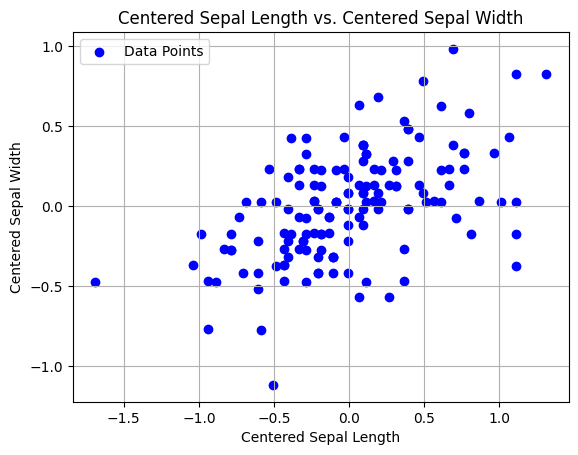

In [7]:
plt.scatter(centered_sepal_length, centered_sepal_width, c='blue', marker='o', label='Data Points')
plt.xlabel('Centered Sepal Length')
plt.ylabel('Centered Sepal Width')
plt.title('Centered Sepal Length vs. Centered Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

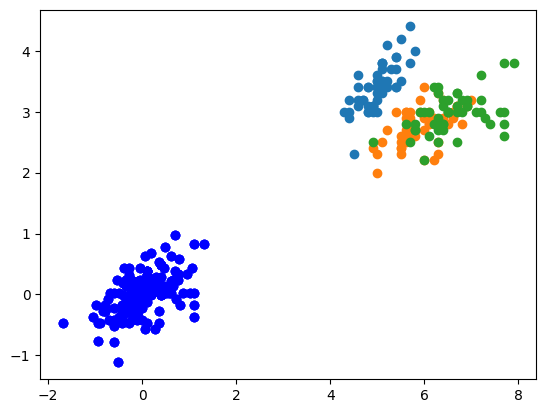

In [9]:
# Comparison
for class_label, marker_shape in class_shape_map.items():
    class_data = df[df['name'] == class_label]
    plt.scatter(class_data['sepal_len'], class_data['sepal_wid'], marker='o', label='Data Points')
    plt.scatter(centered_sepal_length, centered_sepal_width, c='blue', marker='o', label='Centered Data Points')
# plt.grid(True)

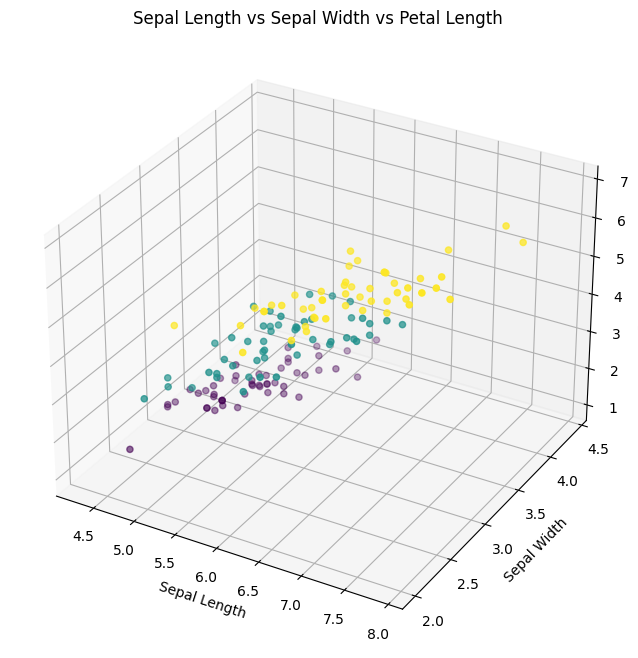

In [32]:
# in 3D Plot the data points using the first three dimensions (Sepal Length, Sepal Width, Petal Length) .

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

def marklabel(x):
  return 1 if x=='Iris-setosa' else (2 if x == 'Iris-versicolor' else 3)
target = [marklabel(i) for i in np.array(df['name'])]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.array(df['sepal_len']),np.array(df['sepal_wid']), np.array(df['petal_len']), c=target, cmap='viridis', marker='o')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('Sepal Length vs Sepal Width vs Petal Length')
plt.show()